In [30]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import skimage.measure

import random
import copy
import math
import cv2
import os

# TRAINED MODELS
## Variables definition

In [31]:
div = 32
step = int(32/4)
red = 4

map_list_t = ['master_big','master_big_closed','master_big_semiclosed']
map_root_name = 'master_big'
map_list = ['map2','stanford_hyang10','master_big','willow','costacafe','map1','map3','stanford_coupa0', 'stanford_coupa3','stanford_hyang1','stanford_gates2']
map_list = ['stanford_hyang10','stanford_coupa0', 'stanford_coupa3','stanford_hyang1','stanford_gates2']

sem_dict = ['cash', 'entrance', 'light', 'sit', 'stairs', 'trash', 'tree','restricted','grass','intersection']
chans = len(sem_dict)+1

lut_in = [0, 20, 50, 100, 150, 255]
lut_out = [0, 100, 180, 220, 240, 255]
lut_8u = np.interp(np.arange(0, 256), lut_in, lut_out).astype(np.uint8)

# Loading of the models

In [32]:
spec = 'stan'
date = '31jan'

model = tf.keras.models.load_model('IRI_models/'+date+'_'+str(step)+'px_steps_'+spec+'_paths')

# model1 = tf.keras.models.load_model('IRI_models/'+date+'_8px_steps_'+spec+'_vels')

# model2 = tf.keras.models.load_model('IRI_models/'+date+'_8px_steps_'+spec+'_stops')

## Testing closed corridors (completely or partially closed)

In [33]:
# for map_name in map_list_t:
#   print(map_name)

#   lines = 0
#   with open('maps/semantics/'+map_root_name+'/'+map_name+'.csv') as f:
#     lines = f.readlines()

#   h = len(lines)
#   w = len(lines[0].split(','))

#   # Converts data to a list of integers
#   map = []
#   for line in lines:
#     map.extend([int(c) for c in line.split(',')])

#   for lab_class in sem_dict:
#     lines = 0
#     try:
#       with open('maps/semantics/'+map_root_name+'/'+map_root_name+'_sem_'+lab_class+'.csv') as f:
#         lines = f.readlines()

#       hh = len(lines)
#       ww = len(lines[0].split(','))

#       if hh != h or ww != w:
#         print(f'h: {h}\tw: {w}')
#         print(f'h: {hh}\tw: {ww}')
#         raise SystemExit("ERROR: Different sizes!!")

#       # Converts data to a list of integers
#       for line in lines:
#         map.extend([int(c) for c in line.split(',')])

#     except FileNotFoundError:
#       for i in range(h):
#         for j in range(w):
#           map.extend([255])

#   map = np.reshape(map,[chans,h,w])
#   map = np.moveaxis(map, 0, -1)
#   map = map/255

#   map_aux = map
#   map = np.zeros((int(math.ceil(h/2)),int(math.ceil(w/2)),chans))

#   for idx in range(chans):
#     map[:,:,idx] = skimage.measure.block_reduce(map_aux[:,:,idx], (2,2), np.max)
#   h, w, _ = map.shape

#   diff_h = int((h-div*int(h/div))/2)
#   r_h = int((h-div*int(h/div))%2) + diff_h
#   diff_w = int((w-div*int(w/div))/2)
#   r_w = int((w-div*int(w/div))%2) + diff_w
#   map = map[r_h:-diff_h:,r_w+diff_w:,:]

#   # print(map.shape)
#   h, w, _ = map.shape

#   # -----------------------------------------------------------------------------------
#   # creating subplot and figure
#   fig = plt.figure(figsize=(w/70,h/70))
#   data_pred = np.zeros((int(math.ceil(h)),int(math.ceil(w))))

#   step = int(32/4)
#   for i in np.arange((w/step+int(div/step-1))*(h/step+int(div/step-1))):
#     c = int(i%(w/step+int(div/step-1))) - int(div/step-1)*0
#     r = int(i/(w/step+int(div/step-1))) - int(div/step-1)*0
#     submap = map[max(step*r,0):step*r+div, max(step*c,0):step*c+div,:]
#     subdata = model.predict(np.expand_dims(submap,axis=0),verbose=0)[:,:,:,0]
#     subdata = np.squeeze(subdata,axis=0)
#     data_pred[max(step*r,0):step*r+div, max(step*c,0):step*c+div] += subdata*1/(int(div/step)*int(div/step))
#   contrasted_data = cv2.LUT((data_pred/np.max(data_pred)*255).astype(np.uint8), lut_8u).astype(float)/255
#   plt.imshow(np.multiply(np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2), np.stack((np.full(contrasted_data.shape,1),1-contrasted_data,1-contrasted_data),axis=2)), vmin=0, vmax=1)
#   # plt.imshow(np.multiply(np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2), np.stack((np.full(data_pred.shape,1),1-data_pred,1-data_pred),axis=2)), vmin=0, vmax=1)
#   plt.show()

## Model 1 testing

map2
Using original map
['cash', 'entrance', 'light', 'sit', 'stairs', 'trash', 'tree', 'restricted', 'grass', 'intersection']


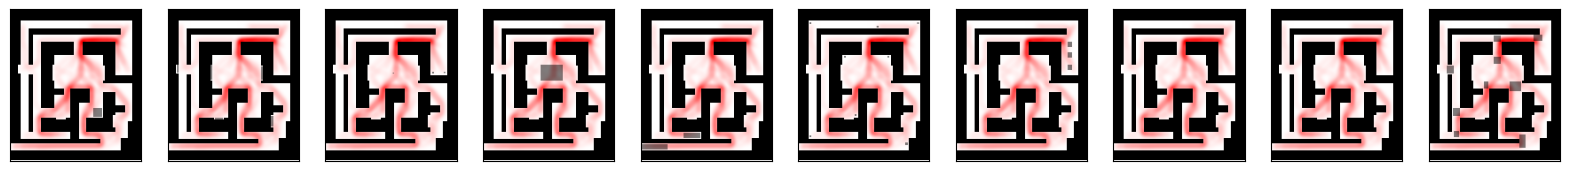

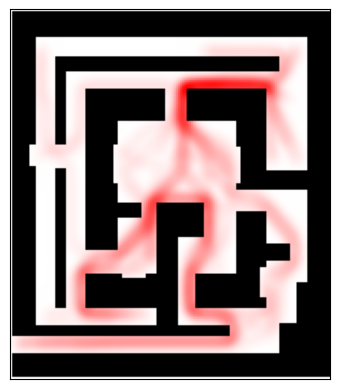

/var/folders/sl/xwj25syx3nz371hyqyk354bc0000gn/T/ipykernel_26110/2083388494.py:139: RuntimeWarning: divide by zero encountered in divide
  selections = 1/selections


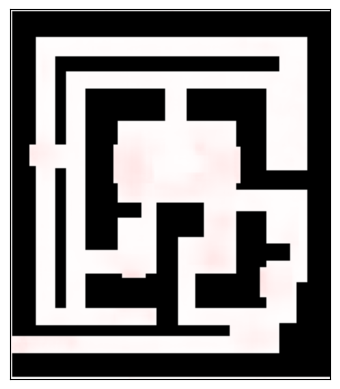

KL-divergence: 1.2133271084150028
stanford_hyang10
Reduced map found
['cash', 'entrance', 'light', 'sit', 'stairs', 'trash', 'tree', 'restricted', 'grass', 'intersection']


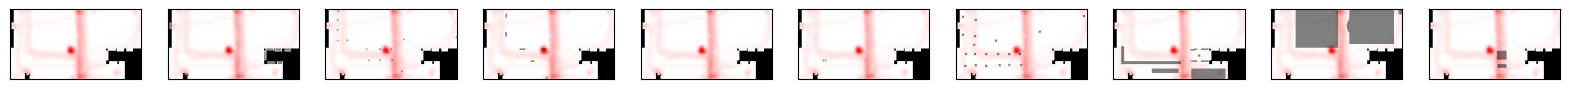

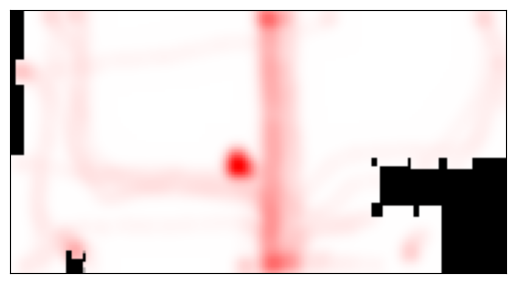

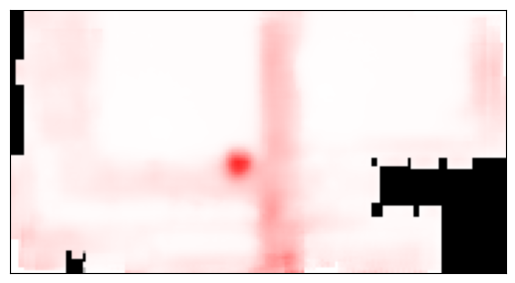

KL-divergence: 0.3312684788667258
master_big
Using original map
['cash', 'entrance', 'light', 'sit', 'stairs', 'trash', 'tree', 'restricted', 'grass', 'intersection']


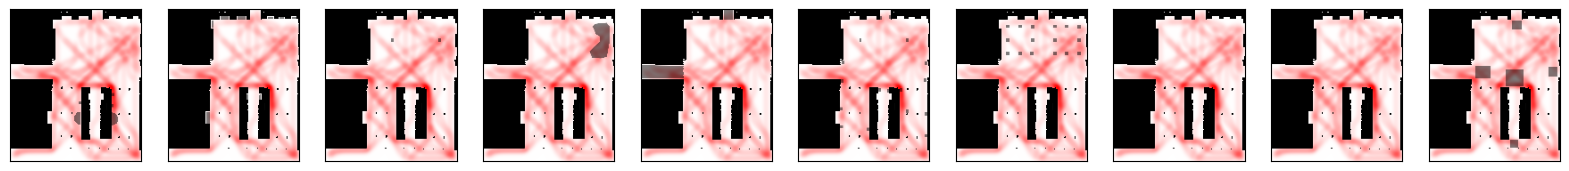

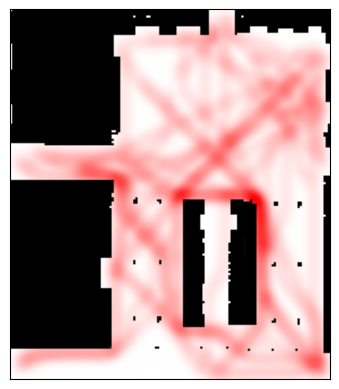

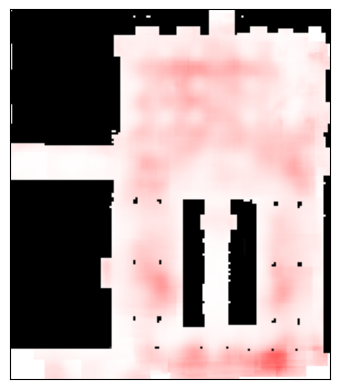

KL-divergence: 1.016928517319637
willow
Using original map
['cash', 'entrance', 'light', 'sit', 'stairs', 'trash', 'tree', 'restricted', 'grass', 'intersection']


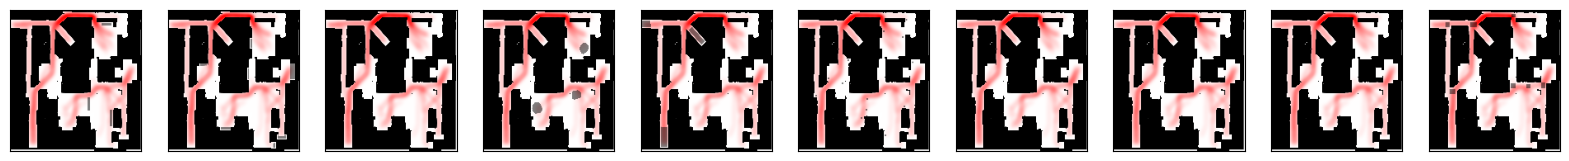

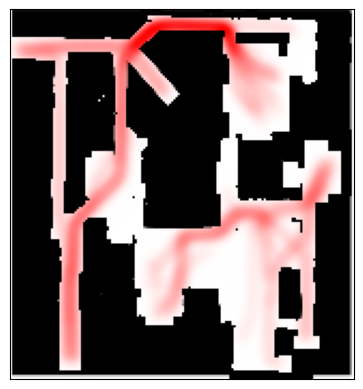

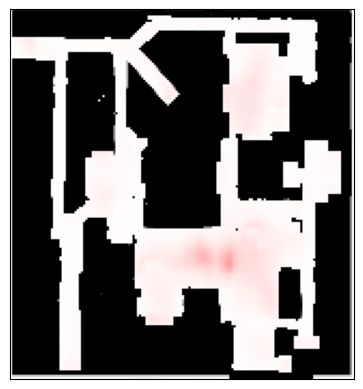

KL-divergence: 1.9092042875510096
costacafe
Using original map
['cash', 'entrance', 'light', 'sit', 'stairs', 'trash', 'tree', 'restricted', 'grass', 'intersection']


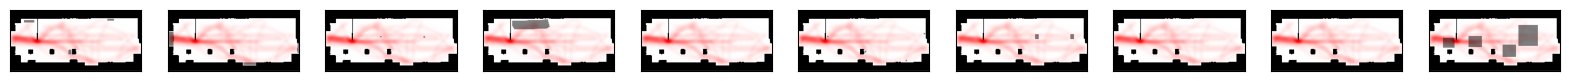

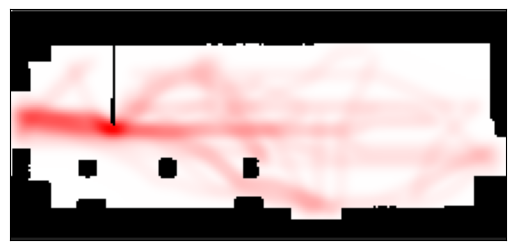

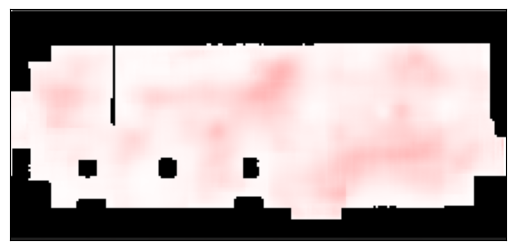

KL-divergence: 1.0360982894291195
map1
Using original map
['cash', 'entrance', 'light', 'sit', 'stairs', 'trash', 'tree', 'restricted', 'grass', 'intersection']


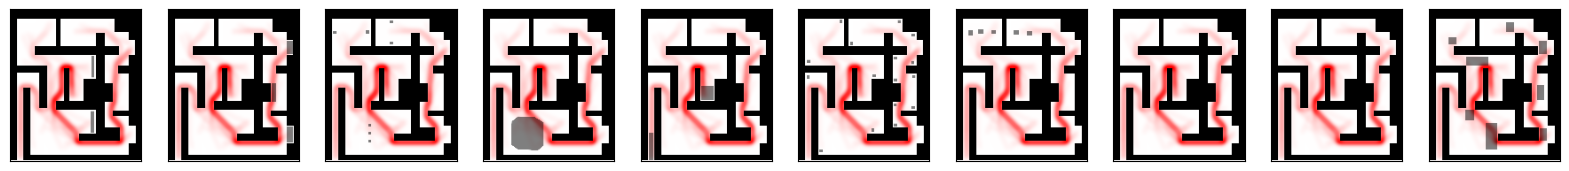

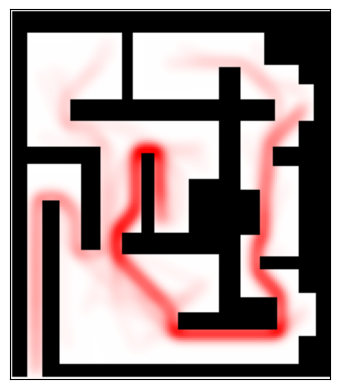

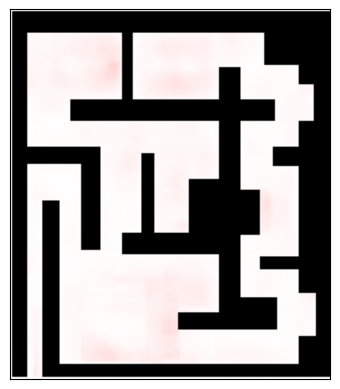

KL-divergence: 1.921296282626964
map3
Using original map
['cash', 'entrance', 'light', 'sit', 'stairs', 'trash', 'tree', 'restricted', 'grass', 'intersection']


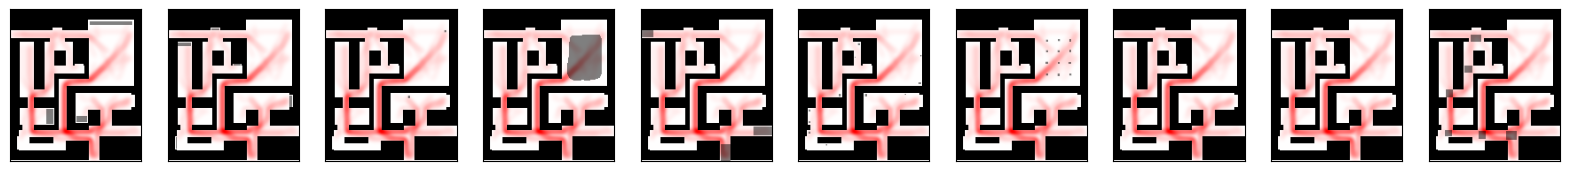

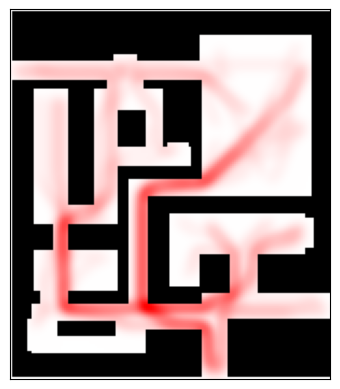

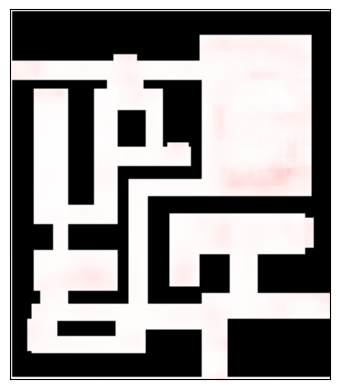

KL-divergence: 1.5886230002076054
stanford_coupa0
Reduced map found
['cash', 'entrance', 'light', 'sit', 'stairs', 'trash', 'tree', 'restricted', 'grass', 'intersection']


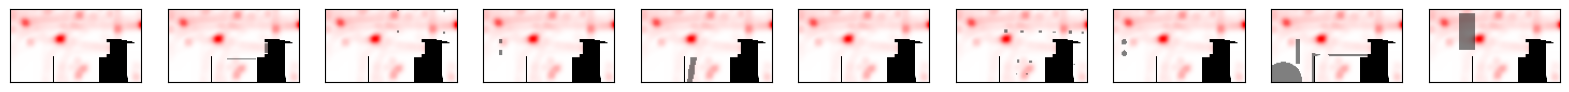

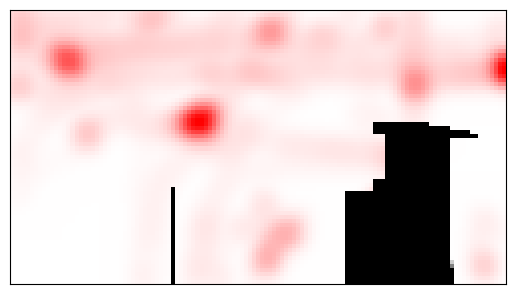

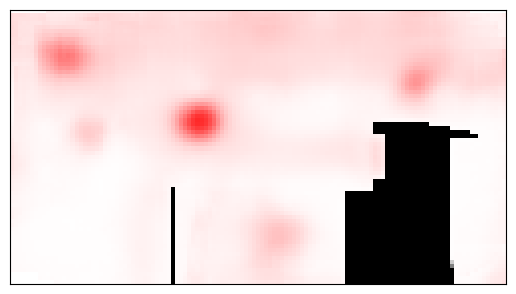

KL-divergence: 0.1638644184998181
stanford_coupa3
Reduced map found
['cash', 'entrance', 'light', 'sit', 'stairs', 'trash', 'tree', 'restricted', 'grass', 'intersection']


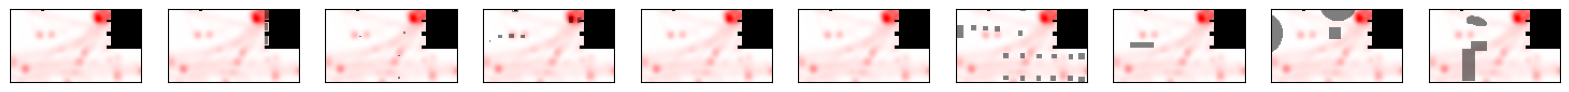

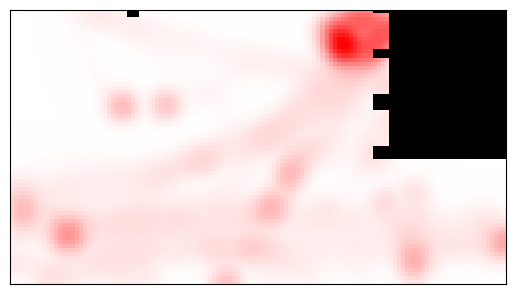

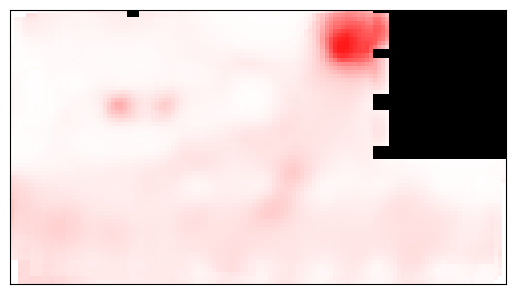

KL-divergence: 0.1280739244642621
stanford_hyang1
Reduced map found
['cash', 'entrance', 'light', 'sit', 'stairs', 'trash', 'tree', 'restricted', 'grass', 'intersection']


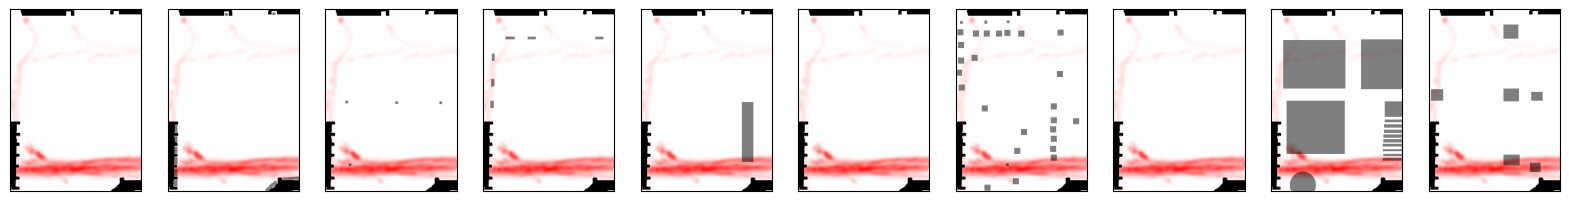

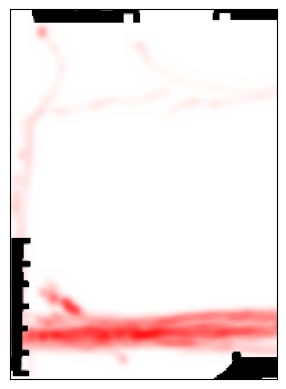

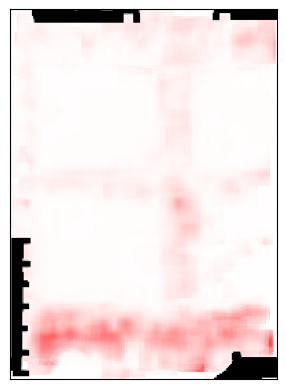

KL-divergence: 1.0811877616260976
stanford_gates2
Reduced map found
['cash', 'entrance', 'light', 'sit', 'stairs', 'trash', 'tree', 'restricted', 'grass', 'intersection']


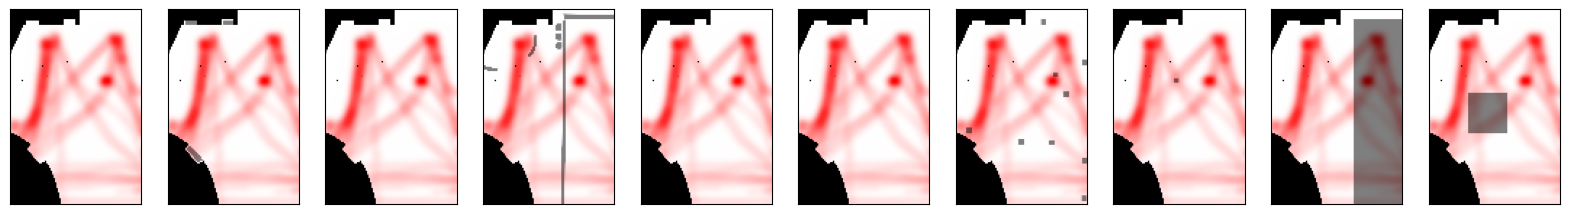

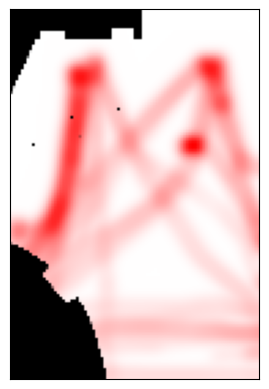

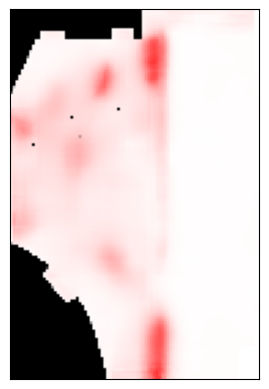

KL-divergence: 1.9899527485732926
Mean KL-divergence: 1.1254386197799577


In [34]:
kl1 = []

for map_count, map_name in enumerate(map_list):
  print(map_name)

  lines = 0
  try:
    with open('maps/semantics/'+map_name+'/'+map_name+'-reduced.csv') as f:
      print('Reduced map found')
      lines = f.readlines()
      
  except FileNotFoundError:
    with open('maps/semantics/'+map_name+'/'+map_name+'.csv') as f:
      print('Using original map')
      lines = f.readlines()

  h = len(lines)
  w = len(lines[0].split(','))

  # Converts data to a list of integers
  map = []
  for line in lines:
    map.extend([int(c) for c in line.split(',')])

  for lab_class in sem_dict:
    lines = 0
    try:
      with open('maps/semantics/'+map_name+'/'+map_name+'_sem_'+lab_class+'-reduced.csv') as f:
        lines = f.readlines()

      hh = len(lines)
      ww = len(lines[0].split(','))

      if hh != h or ww != w:
        print(f'h: {h}\tw: {w}')
        print(f'h: {hh}\tw: {ww}')
        raise SystemExit("ERROR: Different sizes!!")

      # Converts data to a list of integers
      for line in lines:
        map.extend([int(c) for c in line.split(',')])
    
    except FileNotFoundError:
      try:
        with open('maps/semantics/'+map_name+'/'+map_name+'_sem_'+lab_class+'.csv') as f:
          lines = f.readlines()

        hh = len(lines)
        ww = len(lines[0].split(','))

        if hh != h or ww != w:
          print(f'h: {h}\tw: {w}')
          print(f'h: {hh}\tw: {ww}')
          raise SystemExit("ERROR: Different sizes!!")

        # Converts data to a list of integers
        for line in lines:
          map.extend([int(c) for c in line.split(',')])

      except FileNotFoundError:
        for i in range(h):
          for j in range(w):
            map.extend([255])

  map = np.reshape(map,[chans,h,w])
  map = np.moveaxis(map, 0, -1)
  map = map/255

  map_aux = map
  map = np.zeros((int(math.ceil(h/red)),int(math.ceil(w/red)),chans))

  for idx in range(chans):
    map[:,:,idx] = skimage.measure.block_reduce(map_aux[:,:,idx], (red,red), np.max)

  # print(map.shape)
  h, w, _ = map.shape

# -----------------------------------------------------------------------------------
  lines = 0
  with open('maps/semantics/'+map_name+'/humandensity-'+map_name+'-new.csv') as f:
    lines = f.readlines()

  hd = len(lines)
  wd = len(lines[0].split(','))

  # Converts data to a list of integers
  data = []
  for line in lines:
    data.extend([int(c) for c in line.split(',')])

  data = np.reshape(data,[hd,wd])
  sigma = 10.0
  data = skimage.filters.gaussian(data, sigma=(sigma, sigma), channel_axis=-1)
  data = skimage.measure.block_reduce(data, (red,red), np.max)
  data = np.subtract(data, np.full((h, w), np.min(data)))/(np.max(data)-np.min(data))
  data = data*(map[:,:,0]>0)

  # print(data.shape)
  hd, wd = data.shape

  print(sem_dict)
  plt.figure(figsize=(20,5))
  for i in range(len(sem_dict)):
    ax = plt.subplot(1, len(sem_dict), i+1)
    alp = 0.5
    ax.imshow(np.multiply(np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2),np.multiply(np.stack((map[:,:,i+1],map[:,:,i+1],map[:,:,i+1]),axis=2)*alp+(1-alp), np.stack((np.full(data.shape,1),1-data,1-data),axis=2))), vmin=0, vmax=1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

  ax = plt.subplot(111)
  ax.imshow(np.multiply(np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2), np.stack((np.full(data.shape,1),1-data,1-data),axis=2)), vmin=0, vmax=1)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()

  # -----------------------------------------------------------------------------------
  # Random sample 32x32 windows in map
  n_crops = 500
  inserted = 0
  crops = np.zeros((n_crops,2),dtype=int)
  selections = np.zeros((h,w))
  for i in range(n_crops):
    background = np.zeros((h,w))
    flag = True
    while flag:
      aux_x = int(random.random()*(w-div+1))
      aux_y = int(random.random()*(h-div+1))
      flag = False
      # print(f'INSERTED: {inserted}  ->  x: {aux_x} and y: {aux_y}')
      # for z in range(inserted):
      #   if abs(aux_x-crops[z,0])<int(div/10) and abs(aux_y-crops[z,1])<int(div/10):
      #     # print('too close')
      #     flag = True
    crops[i,0] = aux_x
    crops[i,1] = aux_y
    selections = selections+cv2.rectangle(background,(crops[i,0],crops[i,1]),(crops[i,0]+div-1,crops[i,1]+div-1),(1,0,0),-1)
    inserted = inserted + 1
  selections = 1/selections

  # -----------------------------------------------------------------------------------
  # creating subplot and figure
  ax = plt.subplot(111)
  data_pred = np.zeros((int(math.ceil(h)),int(math.ceil(w))))

  for i in range(n_crops):
    submap = map[crops[i,1]:crops[i,1]+div, crops[i,0]:crops[i,0]+div,:]
    subdata = model.predict(np.expand_dims(submap,axis=0),verbose=0)[:,:,:,0]
    subdata = np.squeeze(subdata,axis=0)
    data_pred[crops[i,1]:crops[i,1]+div, crops[i,0]:crops[i,0]+div] += subdata*selections[crops[i,1]:crops[i,1]+div, crops[i,0]:crops[i,0]+div]
  plt.imshow(np.multiply(np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2), np.stack((np.full(data_pred.shape,1),1-data_pred,1-data_pred),axis=2)), vmin=0, vmax=1)
  # plt.imshow(np.multiply(np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2), np.stack((np.full(data_pred.shape,1),1-data_pred,1-data_pred),axis=2)), vmin=0, vmax=1)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()

  data = data/sum(sum(data))
  data_pred = data_pred/sum(sum(data_pred))
  kl = 0
  for i in range(data.shape[0]):
      for j in range(data.shape[1]):
          if data[i,j] > 0 and data_pred[i,j] > 0:
              kl = kl + data[i,j]*math.log2(data[i,j]/data_pred[i,j])
  print(f'KL-divergence: {kl}')
  kl1 = np.append(kl1,kl)

print(f'Mean KL-divergence: {np.mean(kl1)}')

## Model 2 testing

In [ ]:
kl1 = []

for map_count, map_name in enumerate(map_list):
  print(map_name)

  lines = 0
  with open('maps/semantics/'+map_name+'/'+map_name+'.csv') as f:
    lines = f.readlines()

  h = len(lines)
  w = len(lines[0].split(','))

  # Converts data to a list of integers
  map = []
  for line in lines:
    map.extend([int(c) for c in line.split(',')])

  for lab_class in sem_dict:
    lines = 0
    try:
      with open('maps/semantics/'+map_name+'/'+map_name+'_sem_'+lab_class+'.csv') as f:
        lines = f.readlines()

      hh = len(lines)
      ww = len(lines[0].split(','))

      if hh != h or ww != w:
        print(f'h: {h}\tw: {w}')
        print(f'h: {hh}\tw: {ww}')
        raise SystemExit("ERROR: Different sizes!!")

      # Converts data to a list of integers
      for line in lines:
        map.extend([int(c) for c in line.split(',')])

    except FileNotFoundError:
      for i in range(h):
        for j in range(w):
          map.extend([255])

  map = np.reshape(map,[chans,h,w])
  map = np.moveaxis(map, 0, -1)
  map = map/255

  map_aux = map
  map = np.zeros((int(math.ceil(h/red)),int(math.ceil(w/red)),chans))

  for idx in range(chans):
    map[:,:,idx] = skimage.measure.block_reduce(map_aux[:,:,idx], (red,red), np.max)
  h, w, _ = map.shape

  diff_h = int((h-div*int(h/div))/2)
  r_h = int((h-div*int(h/div))%2) + diff_h
  diff_w = int((w-div*int(w/div))/2)
  r_w = int((w-div*int(w/div))%2) + diff_w
  map = map[r_h:-diff_h:,r_w+diff_w:,:]

  # print(map.shape)
  h, w, _ = map.shape

# -----------------------------------------------------------------------------------
  lines = 0
  with open('maps/semantics/'+map_name+'/humandensity-'+map_name+'-vel.csv') as f:
    lines = f.readlines()

  hd = len(lines)
  wd = len(lines[0].split(','))

  # Converts data to a list of integers
  data = []
  for line in lines:
    data.extend([float(c) for c in line.split(',')])

  data = np.reshape(data,[hd,wd])
  sigma = 10.0
  data = skimage.filters.gaussian(data, sigma=(sigma, sigma), channel_axis=-1)
  data = skimage.measure.block_reduce(data, (red,red), np.max)
  data = data[r_h:-diff_h,r_w+diff_w:]
  data = np.subtract(data, np.full((h, w), np.min(data)))/(np.max(data)-np.min(data))

  # print(data.shape)
  hd, wd = data.shape

  print(sem_dict)
  plt.figure(figsize=(20,5))
  for i in range(len(sem_dict)):
    i = i+1
    ax = plt.subplot(1, len(sem_dict), i)
    alp = 0.5
    ax.imshow(np.multiply(np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2),np.multiply(np.stack((map[:,:,i],map[:,:,i],map[:,:,i]),axis=2)*alp+(1-alp), np.stack((np.full(data.shape,1),1-data,1-data),axis=2))), vmin=0, vmax=1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

  ax = plt.subplot(111)
  ax.imshow(np.multiply(np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2), np.stack((np.full(data.shape,1),1-data,1-data),axis=2)), vmin=0, vmax=1)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()

  # -----------------------------------------------------------------------------------
  # creating subplot and figure
  ax = plt.subplot(111)
  data_pred = np.zeros((int(math.ceil(h)),int(math.ceil(w))))

  step = int(32/4)
  for i in np.arange((w/step+int(div/step-1))*(h/step+int(div/step-1))):
    c = int(i%(w/step+int(div/step-1))) - int(div/step-1)*0
    r = int(i/(w/step+int(div/step-1))) - int(div/step-1)*0
    submap = map[max(step*r,0):step*r+div, max(step*c,0):step*c+div,:]
    subdata = model1.predict(np.expand_dims(submap,axis=0),verbose=0)[:,:,:,0]
    subdata = np.squeeze(subdata,axis=0)
    data_pred[max(step*r,0):step*r+div, max(step*c,0):step*c+div] += subdata*1/(int(div/step)*int(div/step))
  plt.imshow(np.multiply(np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2), np.stack((np.full(data_pred.shape,1),1-(data_pred),1-(data_pred)),axis=2)), vmin=0, vmax=1)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()

  data = data/sum(sum(data))
  data_pred = data_pred/sum(sum(data_pred))
  kl = 0
  for i in range(data.shape[0]):
      for j in range(data.shape[1]):
          if data[i,j] > 0 and data_pred[i,j] > 0:
              kl = kl + data[i,j]*math.log2(data[i,j]/data_pred[i,j])
  print(f'KL-divergence: {kl}')
  kl1 = np.append(kl1,kl)

print(f'Mean KL-divergence: {np.mean(kl1)}')

## Model 3 testing

In [ ]:
kl1 = []

for map_count, map_name in enumerate(map_list):
  print(map_name)

  lines = 0
  with open('maps/semantics/'+map_name+'/'+map_name+'.csv') as f:
    lines = f.readlines()

  h = len(lines)
  w = len(lines[0].split(','))

  # Converts data to a list of integers
  map = []
  for line in lines:
    map.extend([int(c) for c in line.split(',')])

  for lab_class in sem_dict:
    lines = 0
    try:
      with open('maps/semantics/'+map_name+'/'+map_name+'_sem_'+lab_class+'.csv') as f:
        lines = f.readlines()

      hh = len(lines)
      ww = len(lines[0].split(','))

      if hh != h or ww != w:
        print(f'h: {h}\tw: {w}')
        print(f'h: {hh}\tw: {ww}')
        raise SystemExit("ERROR: Different sizes!!")

      # Converts data to a list of integers
      for line in lines:
        map.extend([int(c) for c in line.split(',')])

    except FileNotFoundError:
      for i in range(h):
        for j in range(w):
          map.extend([255])

  map = np.reshape(map,[chans,h,w])
  map = np.moveaxis(map, 0, -1)
  map = map/255

  map_aux = map
  map = np.zeros((int(math.ceil(h/red)),int(math.ceil(w/red)),chans))

  for idx in range(chans):
    map[:,:,idx] = skimage.measure.block_reduce(map_aux[:,:,idx], (red,red), np.max)
  h, w, _ = map.shape

  diff_h = int((h-div*int(h/div))/2)
  r_h = int((h-div*int(h/div))%2) + diff_h
  diff_w = int((w-div*int(w/div))/2)
  r_w = int((w-div*int(w/div))%2) + diff_w
  map = map[r_h:-diff_h:,r_w+diff_w:,:]

  # print(map.shape)
  h, w, _ = map.shape

# -----------------------------------------------------------------------------------
  lines = 0
  with open('maps/semantics/'+map_name+'/humandensity-'+map_name+'-stop.csv') as f:
    lines = f.readlines()

  hd = len(lines)
  wd = len(lines[0].split(','))

  # Converts data to a list of integers
  data = []
  for line in lines:
    data.extend([float(c) for c in line.split(',')])

  data = np.reshape(data,[hd,wd])
  sigma = 10.0
  data = skimage.filters.gaussian(data, sigma=(sigma, sigma), channel_axis=-1)
  data = skimage.measure.block_reduce(data, (red,red), np.max)
  data = data[r_h:-diff_h,r_w+diff_w:]
  data = np.subtract(data, np.full((h, w), np.min(data)))/(np.max(data)-np.min(data))

  # print(data.shape)
  hd, wd = data.shape

  print(sem_dict)
  plt.figure(figsize=(20,5))
  for i in range(len(sem_dict)):
    i = i+1
    ax = plt.subplot(1, len(sem_dict), i)
    alp = 0.5
    ax.imshow(np.multiply(np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2),np.multiply(np.stack((map[:,:,i],map[:,:,i],map[:,:,i]),axis=2)*alp+(1-alp), np.stack((np.full(data.shape,1),1-data,1-data),axis=2))), vmin=0, vmax=1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

  ax = plt.subplot(111)
  ax.imshow(np.multiply(np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2), np.stack((np.full(data.shape,1),1-data,1-data),axis=2)), vmin=0, vmax=1)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()

  # -----------------------------------------------------------------------------------
  # creating subplot and figure
  ax = plt.subplot(111)
  data_pred = np.zeros((int(math.ceil(h)),int(math.ceil(w))))

  step = int(32/4)
  for i in np.arange((w/step+int(div/step-1))*(h/step+int(div/step-1))):
    c = int(i%(w/step+int(div/step-1))) - int(div/step-1)*0
    r = int(i/(w/step+int(div/step-1))) - int(div/step-1)*0
    submap = map[max(step*r,0):step*r+div, max(step*c,0):step*c+div,:]
    subdata = model2.predict(np.expand_dims(submap,axis=0),verbose=0)[:,:,:,0]
    subdata = np.squeeze(subdata,axis=0)
    data_pred[max(step*r,0):step*r+div, max(step*c,0):step*c+div] += subdata*1/(int(div/step)*int(div/step))
  plt.imshow(np.multiply(np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2), np.stack((np.full(data_pred.shape,1),1-(data_pred),1-(data_pred)),axis=2)), vmin=0, vmax=1)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()

  data = data/sum(sum(data))
  data_pred = data_pred/sum(sum(data_pred))
  kl = 0
  for i in range(data.shape[0]):
      for j in range(data.shape[1]):
          if data[i,j] > 0 and data_pred[i,j] > 0:
              kl = kl + data[i,j]*math.log2(data[i,j]/data_pred[i,j])
  print(f'KL-divergence: {kl}')
  kl1 = np.append(kl1,kl)


print(f'Mean KL-divergence: {np.mean(kl1)}')